In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import collections
import os

In [2]:
l1=['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain','acidity',
    'ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue','weight_gain','anxiety',
    'cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat','irregular_sugar_level','cough',
    'high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine',
    'nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever',
    'yellow_urine','yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach','swelled_lymph_nodes','malaise',
    'blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain',
    'weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus',
    'neck_pain','dizziness','cramps','bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid',
    'brittle_nails','swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech',
    'knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements',
    'loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability',
    'muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches',
    'watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration',
    'visual_disturbances','receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen'
    ,'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking',
    'pus_filled_pimples','blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails','inflammatory_nails',
    'blister','red_sore_around_nose','yellow_crust_ooze']

In [3]:
disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
    'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
    ' Migraine','Cervical spondylosis',
    'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
    'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
    'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
    'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
    'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
    'Impetigo']

In [5]:
d=pd.read_csv("/root/training.csv")
d.replace({'Prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
df = d.select_dtypes(include =[np.number])
df.head()

,Prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


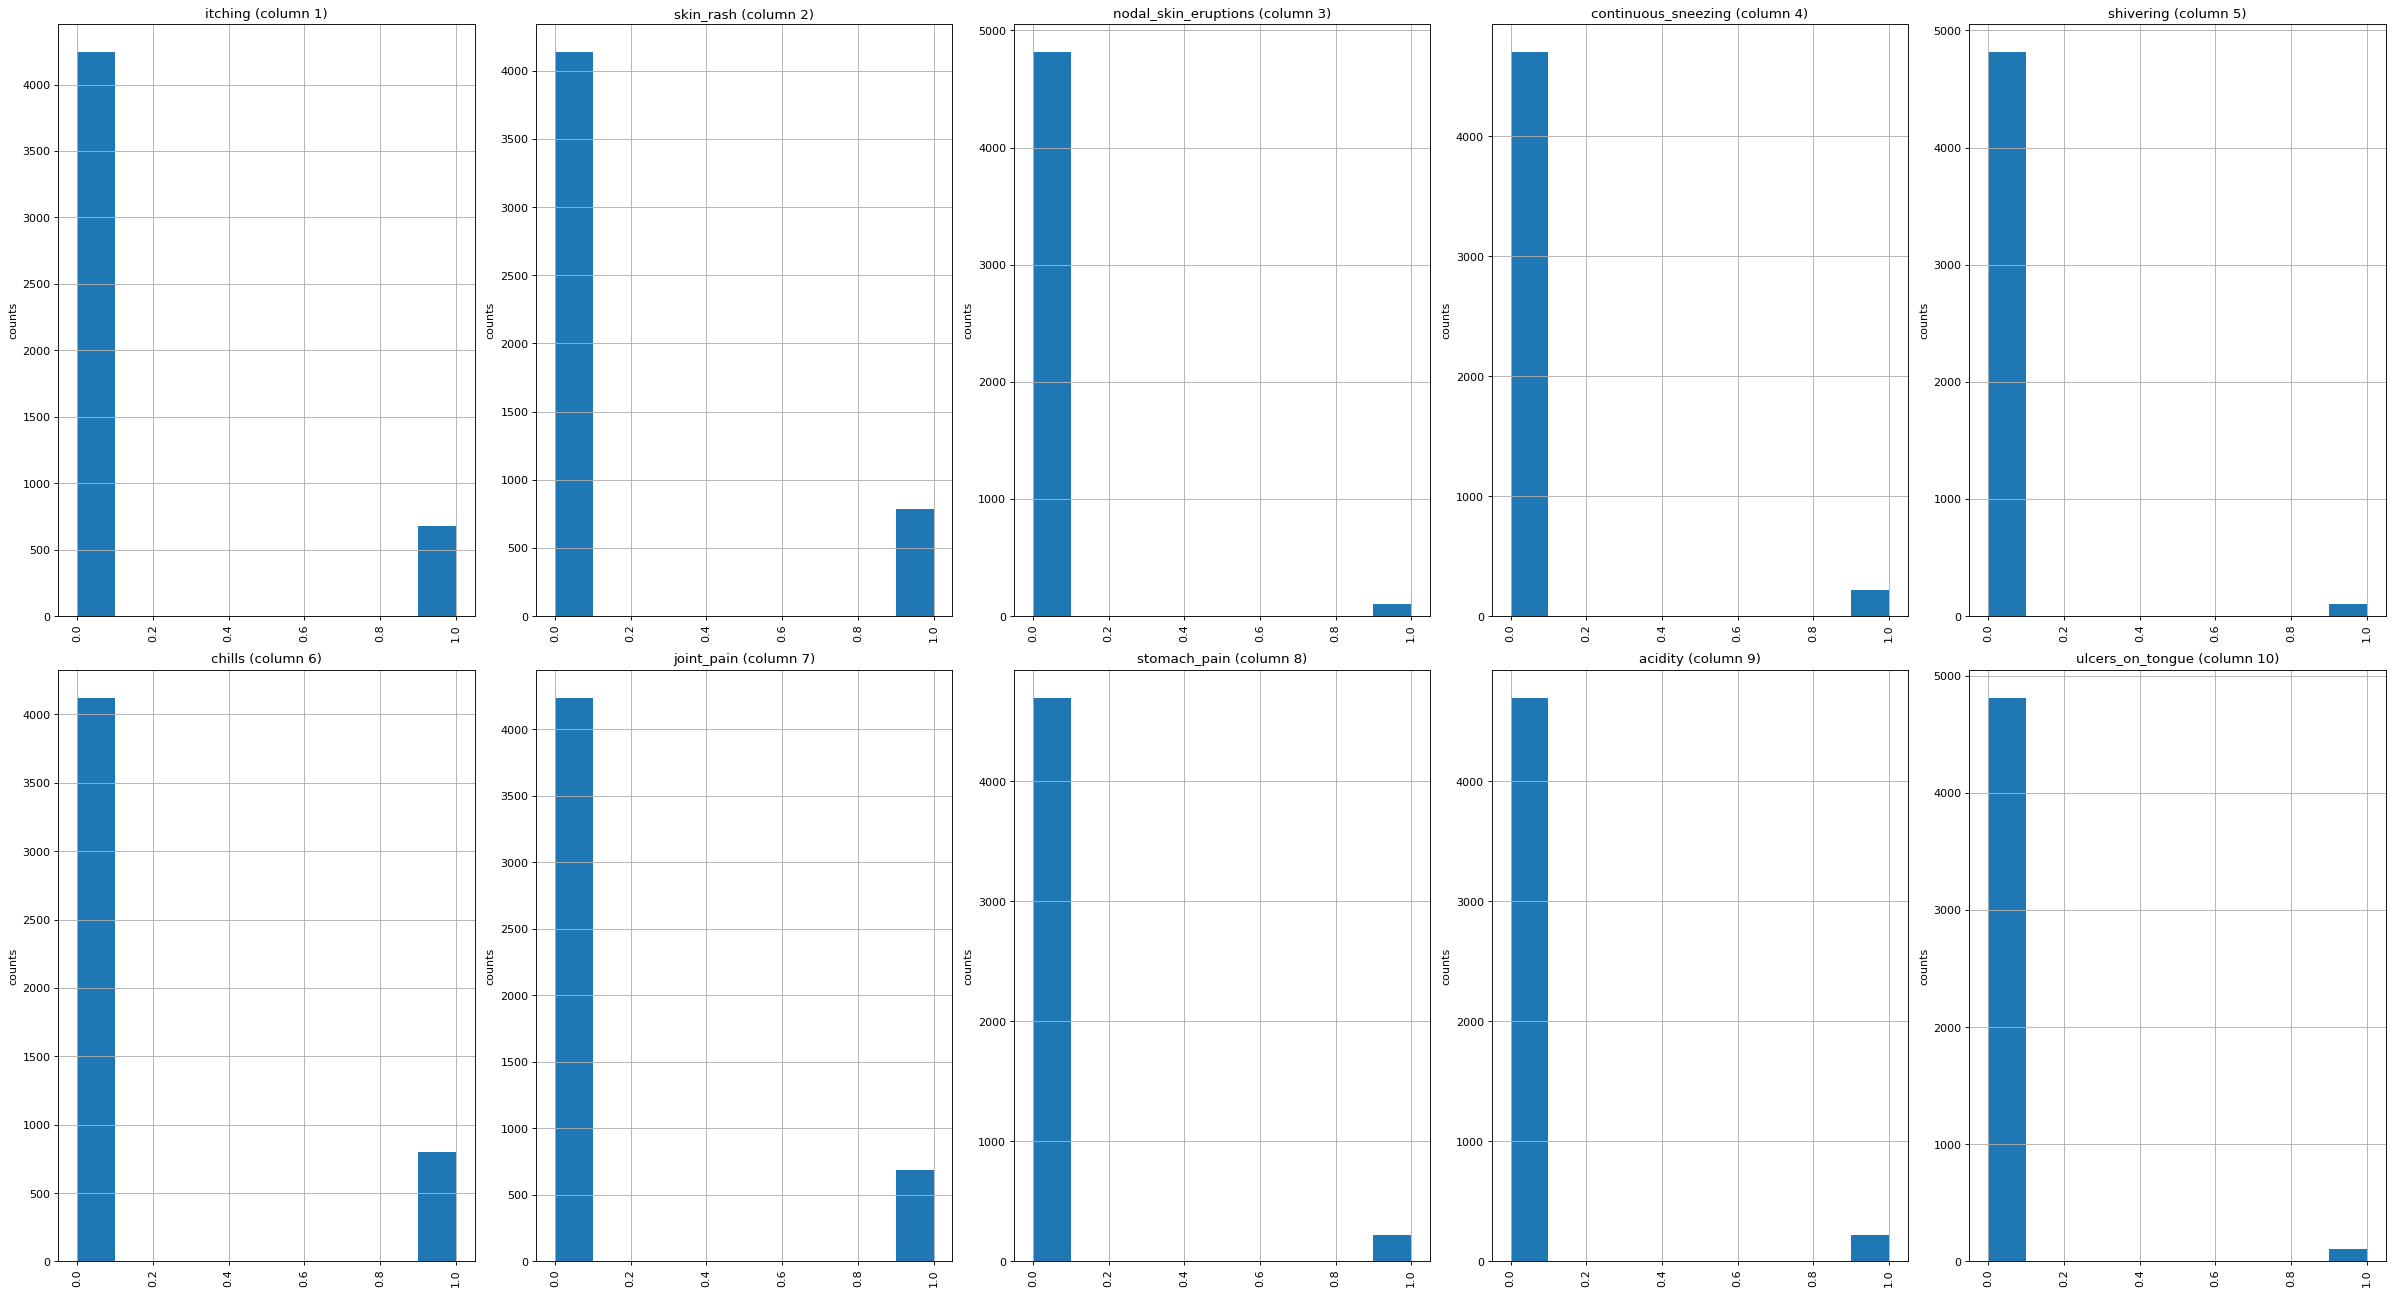

In [6]:
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(1,min(nCol, nGraphShown)+1):
        plt.subplot(nGraphRow, nGraphPerRow, i)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df,10,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


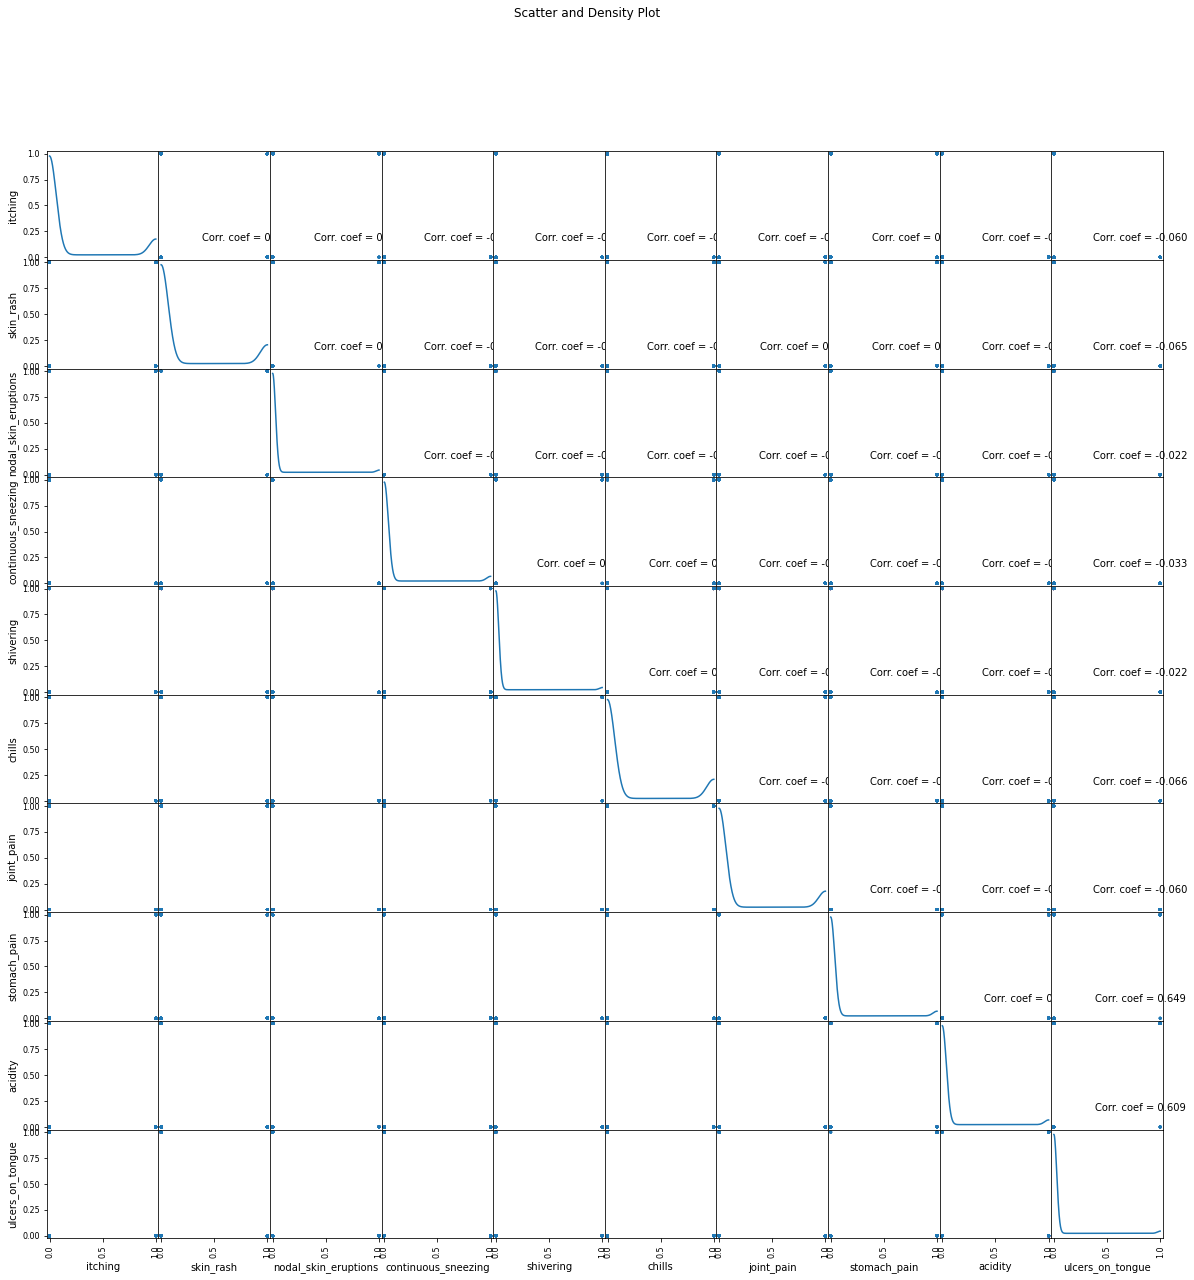

In [7]:
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[1:11]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df, 20, 10)

In [8]:
X = d[l1]
y = d[["Prognosis"]]
np.ravel(y)
print(X)

      itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
0           1          1  ...                     0                  0
1           0          1  ...                     0                  0
2           1          0  ...                     0                  0
3           1          1  ...                     0                  0
4           1          1  ...                     0                  0
...       ...        ...  ...                   ...                ...
4915        0          0  ...                     0                  0
4916        0          1  ...                     0                  0
4917        0          0  ...                     0                  0
4918        0          1  ...                     0                  0
4919        0          1  ...                     1                  1

[4920 rows x 132 columns]


In [9]:
print(y)

      Prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
4915         36
4916         37
4917         38
4918         39
4919         40

[4920 rows x 1 columns]


In [10]:
tr=pd.read_csv("/root/testing.csv")
tr.replace({'Prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()

,Prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


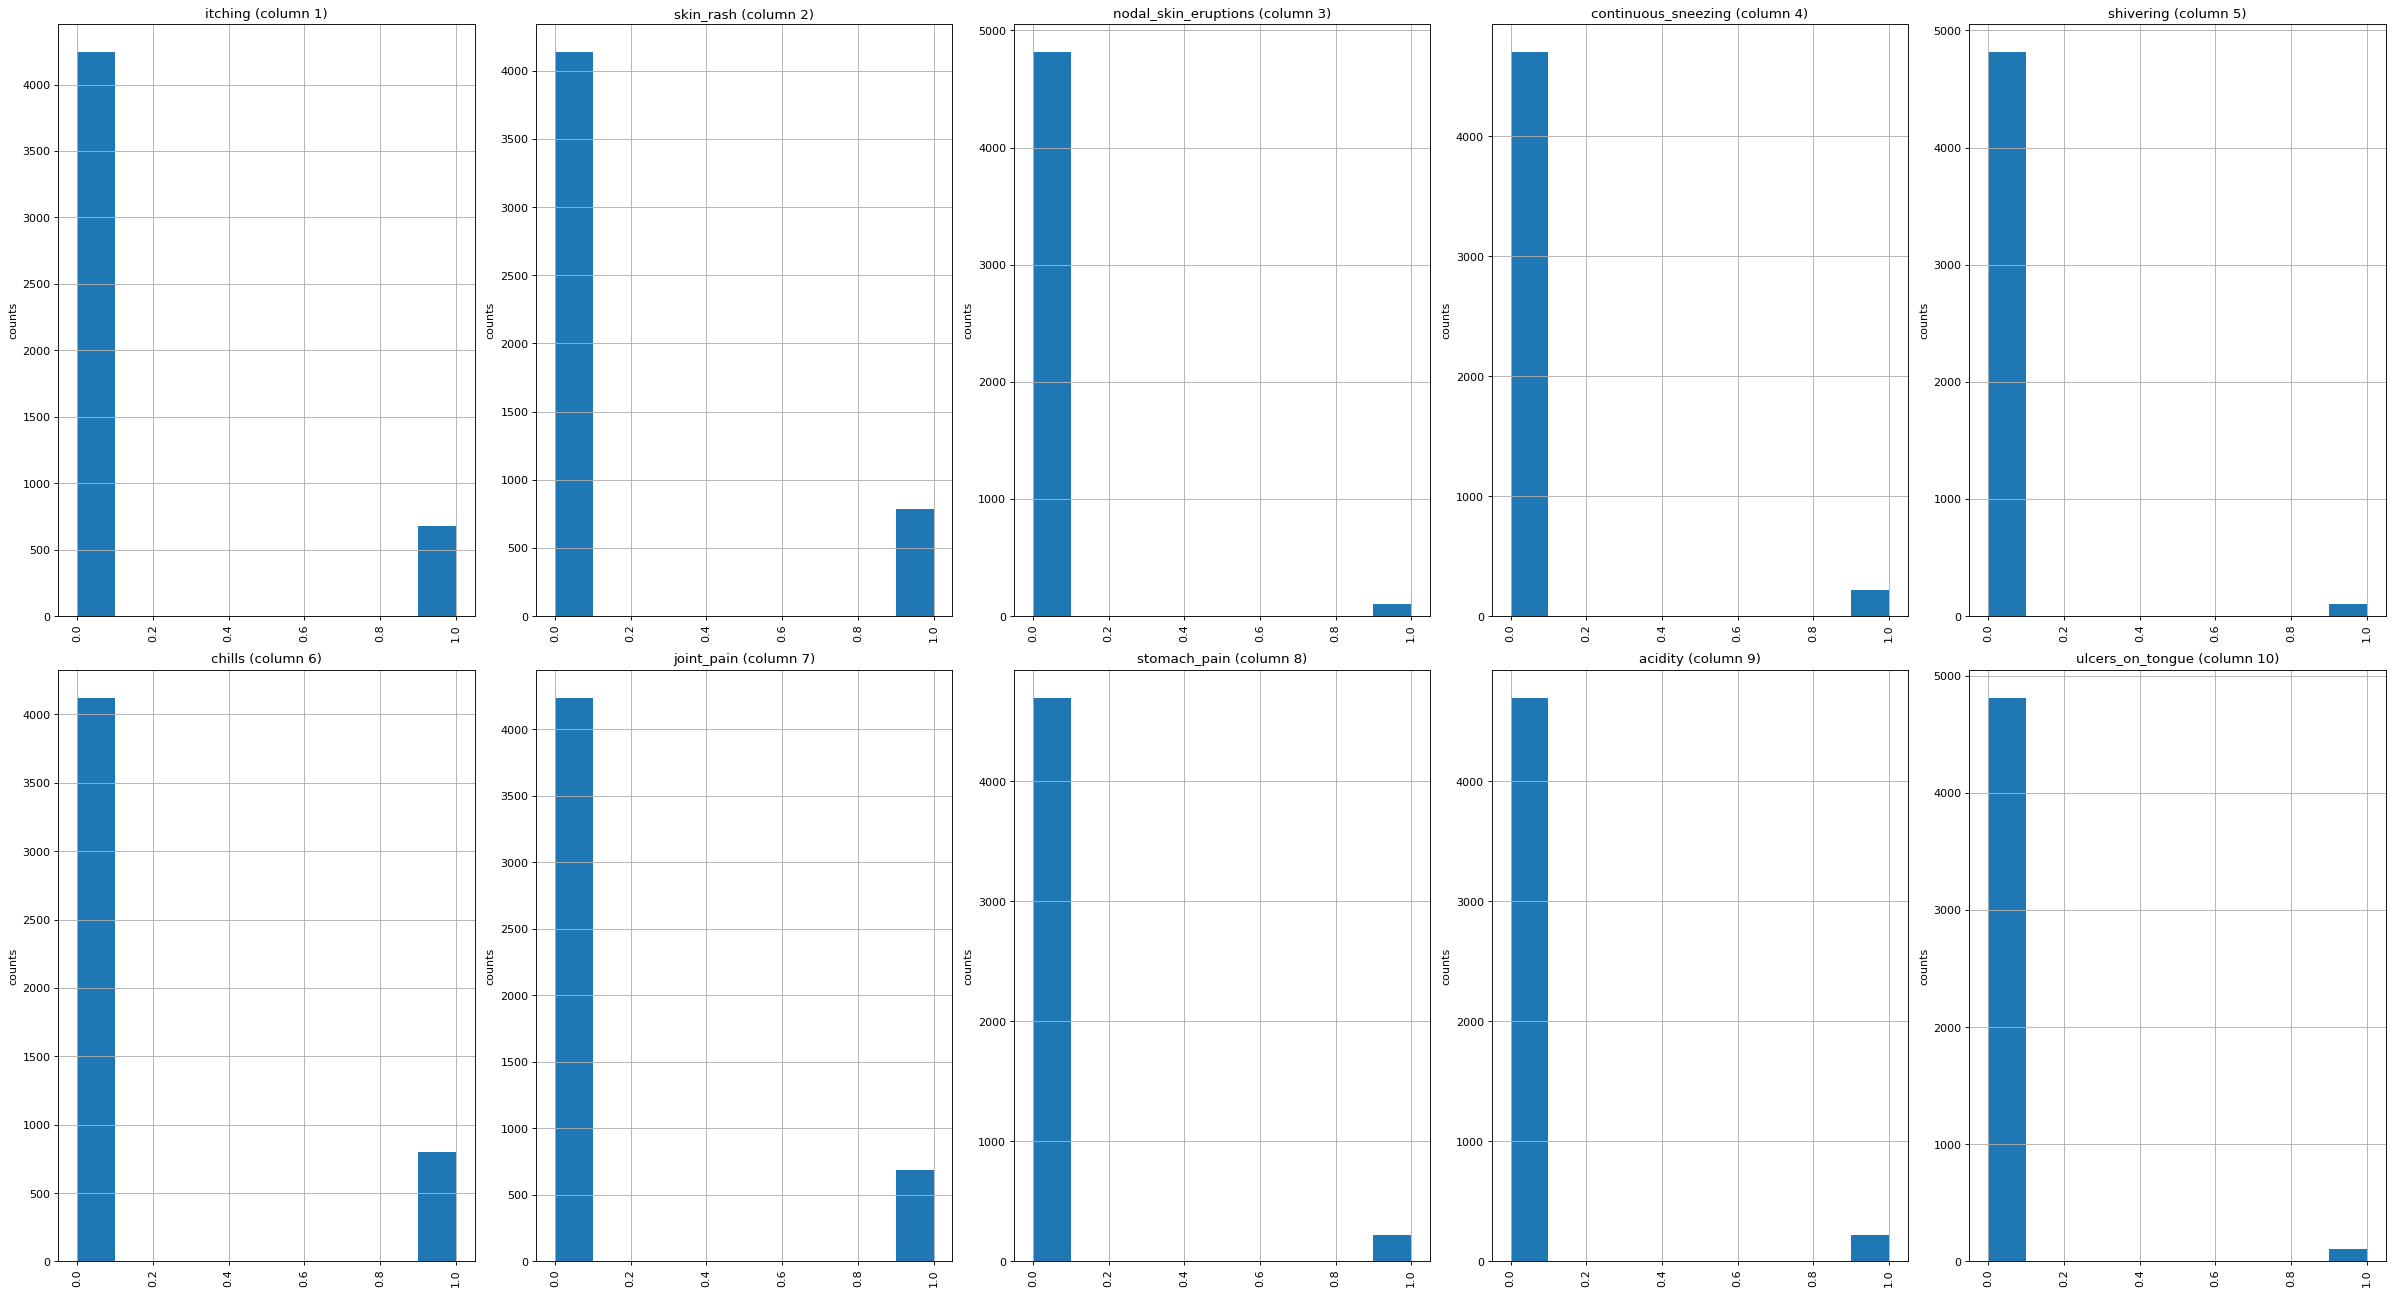

In [11]:
plotPerColumnDistribution(tr, 10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


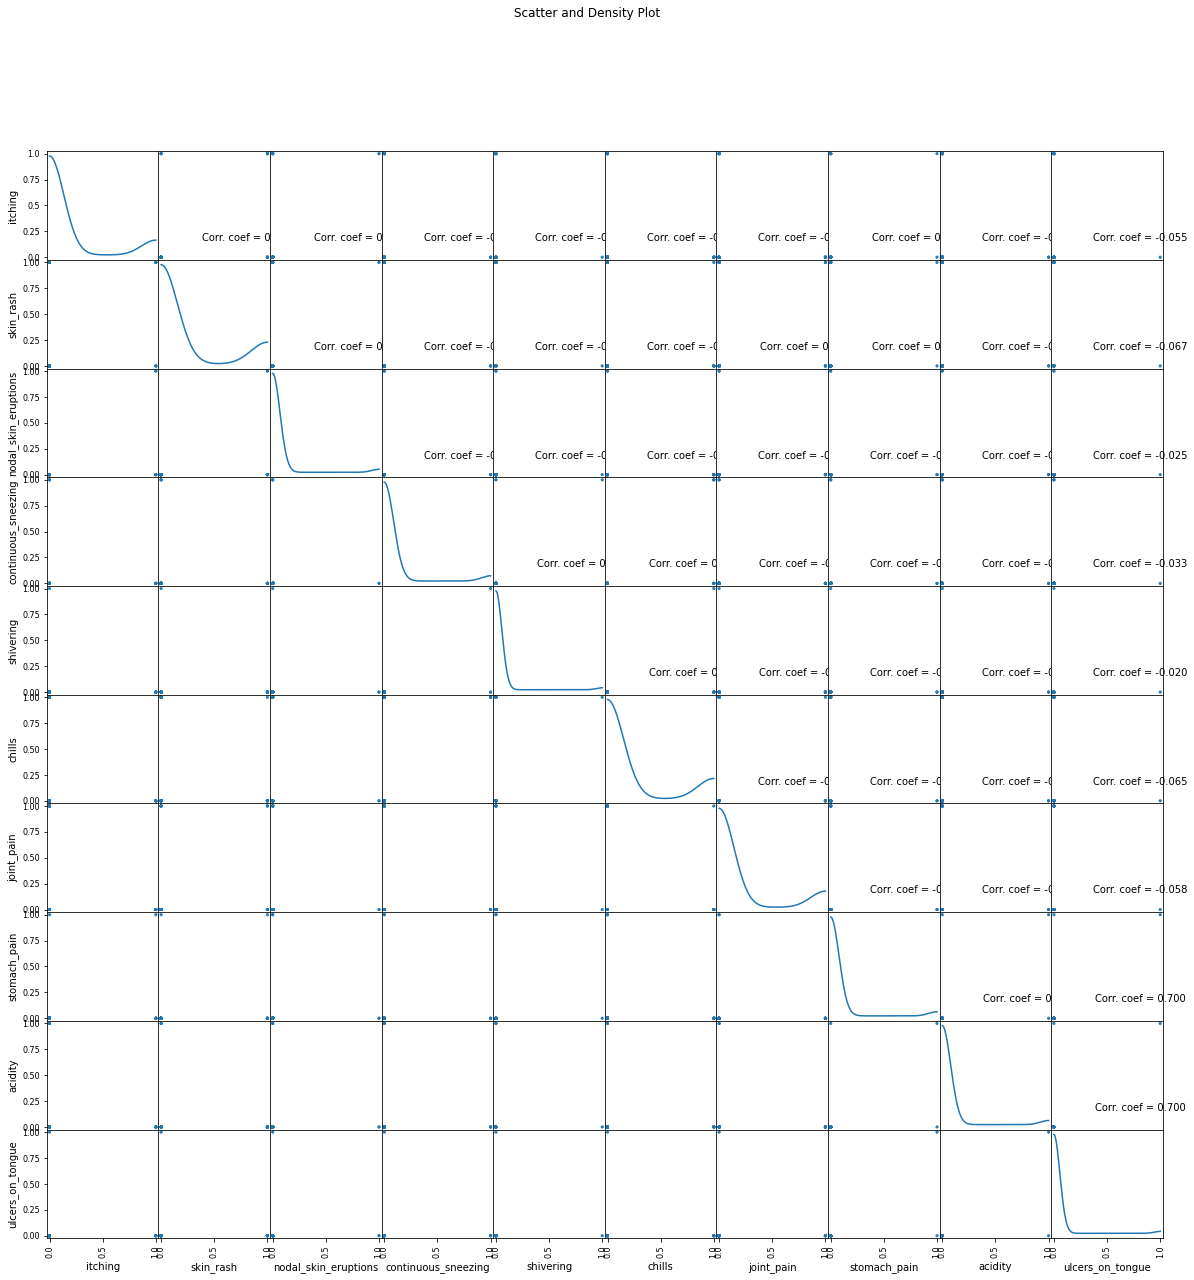

In [12]:
plotScatterMatrix(tr, 20, 10)

In [13]:
X_test= tr[l1]
y_test = tr[["Prognosis"]]
np.ravel(y_test)
print(X_test)

    itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
0         0          0  ...                     0                  0
1         0          0  ...                     0                  0
2         0          0  ...                     0                  0
3         0          0  ...                     0                  0
4         0          0  ...                     0                  0
..      ...        ...  ...                   ...                ...
95        0          1  ...                     0                  0
96        0          0  ...                     0                  0
97        0          1  ...                     0                  0
98        0          1  ...                     1                  1
99        1          1  ...                     0                  0

[100 rows x 132 columns]


In [14]:
print(y_test)

    Prognosis
0          24
1          25
2          26
3          27
4          28
..        ...
95         37
96         38
97         39
98         40
99          0

[100 rows x 1 columns]


In [15]:
ud=pd.read_csv("/root/patientrecords.csv")
ud.head()

,Patient_id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import csv 

In [17]:
def DecisionTree():
    clf1 = tree.DecisionTreeClassifier() 
    clf1 = clf1.fit(X.values,y)
    y_pred=clf1.predict(X_test.values)
    print("Decision Tree")
    print("Accuracy")
    print(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred,normalize=False))
    
    temp = ud.copy()
    dat = ['Patient_id','Decision_Tree_Prediction']
    with open('/root/output.csv', 'w', newline='') as write_obj:
        csv_writer = csv.writer(write_obj)
        csv_writer.writerow(dat)
    for it in temp.values.tolist():
        predict = clf1.predict([it[1:]])
        predicted=predict[0]
        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
          dat = [it[0],disease[a]]
          with open('/root/output.csv', 'a', newline='') as write_obj:
            csv_writer = csv.writer(write_obj)
            csv_writer.writerow(dat)
        else:
          dat = [it[0],'Not Found']
          with open('/root/output.csv', 'a', newline='') as write_obj:
            csv_writer = csv.writer(write_obj)
            csv_writer.writerow(dat)
DecisionTree()
#Accuracy-File Change

Decision Tree
Accuracy
1.0
100


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import csv 

In [19]:
def randomforest():
        clf2 = RandomForestClassifier(n_estimators=100)
        clf2 = clf2.fit(X.values,np.ravel(y))
        # calculating accuracy 
        y_pred=clf2.predict(X_test.values)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        
        new_row_list = []
        row_list = []
        temp = ud.copy()
        with open('/root/output.csv', mode = 'r') as read_obj:
            csv_reader = csv.reader(read_obj)
            for row in csv_reader:
              row_list.append(row)
        i=0
        new_row_list.append(row_list[i]+['Random_Forest_Classifier'])
        i=i+1
        for it in temp.values.tolist():
            predict = clf2.predict([it[1:]])
            predicted=predict[0]
            h='no'
            for a in range(0,len(disease)):
                if(predicted == a):
                    h='yes'
                    break
            if (h=='yes'):
              new_row_list.append(row_list[i]+[disease[a]])
            else:
              new_row_list.append(row_list[i]+['Not Found'])
            i=i+1
        with open('/root/output.csv', 'w', newline='') as write_obj:
           csv_writer = csv.writer(write_obj)
           csv_writer.writerows(new_row_list)
randomforest()

Random Forest
Accuracy
1.0
100


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import csv 

In [21]:
def KNN():
        clf3=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
        clf3=clf3.fit(X.values,np.ravel(y))
        y_pred=clf3.predict(X_test.values)
        print("KNN")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        
        new_row_list = []
        row_list = []
        temp = ud.copy()
        with open('/root/output.csv', mode = 'r') as read_obj:
            csv_reader = csv.reader(read_obj)
            for row in csv_reader:
              row_list.append(row)
        i=0
        new_row_list.append(row_list[i]+['KNN_Classifier'])
        i=i+1
        for it in temp.values.tolist():
            predict = clf3.predict([it[1:]])
            predicted=predict[0]
            h='no'
            for a in range(0,len(disease)):
                if(predicted == a):
                    h='yes'
                    break
            if (h=='yes'):
              new_row_list.append(row_list[i]+[disease[a]])
            else:
              new_row_list.append(row_list[i]+['Not Found'])
            i=i+1
        with open('/root/output.csv', 'w', newline='') as write_obj:
           csv_writer = csv.writer(write_obj)
           csv_writer.writerows(new_row_list)
KNN()

KNN
Accuracy
1.0
100


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import csv 

In [23]:
def NaiveBayes():
        clf4 = GaussianNB()
        clf4=clf4.fit(X.values,np.ravel(y))
        y_pred=clf4.predict(X_test.values)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        
        new_row_list = []
        row_list = []
        temp = ud.copy()
        with open('/root/output.csv', mode = 'r') as read_obj:
            csv_reader = csv.reader(read_obj)
            for row in csv_reader:
              row_list.append(row)
        i=0
        new_row_list.append(row_list[i]+['NaiveBayes_Classifier'])
        i=i+1
        for it in temp.values.tolist():
            predict = clf4.predict([it[1:]])
            predicted=predict[0]
            h='no'
            for a in range(0,len(disease)):
                if(predicted == a):
                    h='yes'
                    break
            if (h=='yes'):
              new_row_list.append(row_list[i]+[disease[a]])
            else:
              new_row_list.append(row_list[i]+['Not Found'])
            i=i+1
        with open('/root/output.csv', 'w', newline='') as write_obj:
           csv_writer = csv.writer(write_obj)
           csv_writer.writerows(new_row_list)
NaiveBayes()

Naive Bayes
Accuracy
1.0
100


In [24]:
def most_frequent(List):
    dict = {}
    count, itm = 1, ''
    for item in reversed(List):
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count :
            count, itm = dict[item], item
    return(itm)
def FinalDecision():
        new_row_list = []
        row_list = []
        with open('/root/output.csv', mode = 'r') as read_obj:
            csv_reader = csv.reader(read_obj)
            for row in csv_reader:
              row_list.append(row)
        new_row_list.append(row_list[0]+['Final_Decision'])
        i=1
        for it in row_list:
            if(it[0]!="Patient_id"):
                new_row_list.append(row_list[i]+[most_frequent(it)])
                i=i+1
        with open('/root/output.csv', 'w', newline='') as write_obj:
           csv_writer = csv.writer(write_obj)
           csv_writer.writerows(new_row_list)
FinalDecision()